In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import corrcoef

In [2]:
#read file
check_in_data = pd.read_csv ("data/yelp_academic_dataset_checkin.csv")

Predicting the amount of footfall on particular days to help restaurants prepare for busy days.

In [3]:
check_in_data.head()   #157075 rows x 169 columns

,time.Sun-7,time.Wed-10,time.Sun-21,time.Tue-3,time.Thu-9,time.Mon-14,time.Sat-15,time.Sat-11,time.Fri-12,time.Wed-21,...,time.Fri-7,time.Wed-5,time.Sun-1,time.Sat-21,time.Sun-8,time.Wed-6,time.Sun-5,time.Tue-16,time.Mon-13,time.Wed-12
0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#  #checkins exploration
#  df=check_in_data.groupby(['weekday','hour'])['checkins'].sum()
#  df=df.reset_index()
#  df=df.pivot(index='hour',columns='weekday')[['checkins']]
#  df.columns = df.columns.droplevel()
#  df=df.reset_index()
#  # Workaround for not being able to sort the values by hour
#  df.hour=df.hour.apply(lambda x: str(x).split(':')[0])
#  df.hour=df.hour.astype(int)
#  # Sort the hour column 
#  df=df.sort_values('hour')
#  df=df[['hour','Mon', 'Tue','Wed','Thu','Fri','Sat', 'Sun' ]]
#  # df=df.set_index('hour')
#  cm = sns.light_palette("orange", as_cmap=True)
#  #highlight the max of each column
#  df.style.apply(highlight_max, color='darkorange', axis=0)

In [5]:
# check_in_data.columns.tolist() # business_id
len(check_in_data.business_id.unique())

157075

157075 unique checkins exist per unique business id

We shall conisder only those with atleast 100 checkins

In [6]:
#moving column business id to the start
cols = list(check_in_data.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('business_id')) #Remove b from list
#cols.pop(cols.index('x')) #Remove x from list
check_in_data = check_in_data[['business_id']+cols] #Create new dataframe with columns in the order you want

In [7]:
check_in_data.head()

,business_id,time.Sun-7,time.Wed-10,time.Sun-21,time.Tue-3,time.Thu-9,time.Mon-14,time.Sat-15,time.Sat-11,time.Fri-12,...,time.Fri-7,time.Wed-5,time.Sun-1,time.Sat-21,time.Sun-8,time.Wed-6,time.Sun-5,time.Tue-16,time.Mon-13,time.Wed-12
0,7KPBkxAOEtb3QeIL9PEErg,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN
1,kREVIrSBbtqBhIYkTccQUg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
2,tJRDll5yqpZwehenzE2cSg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tZccfdl6JNw-j5BKnCTIQQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,r1p7RAMzCV_6NPF0dNoR3g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
%%time
check_in_data.iloc[0,1:].sum()

Wall time: 997 µs


151.0

In [9]:
check_in_data.iloc[1,1:].sum()

7.0

In [10]:
check_in_data_2 = check_in_data.iloc[:,:] #did not remove business_id

In [11]:
check_in_data_2.head()

,business_id,time.Sun-7,time.Wed-10,time.Sun-21,time.Tue-3,time.Thu-9,time.Mon-14,time.Sat-15,time.Sat-11,time.Fri-12,...,time.Fri-7,time.Wed-5,time.Sun-1,time.Sat-21,time.Sun-8,time.Wed-6,time.Sun-5,time.Tue-16,time.Mon-13,time.Wed-12
0,7KPBkxAOEtb3QeIL9PEErg,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN
1,kREVIrSBbtqBhIYkTccQUg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
2,tJRDll5yqpZwehenzE2cSg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tZccfdl6JNw-j5BKnCTIQQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,r1p7RAMzCV_6NPF0dNoR3g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
%%time
checkin_sum = list()
for index, row in check_in_data.iterrows():
    #print (check_in_data_2.iloc[index].sum())
    checkin_sum.append(check_in_data_2.iloc[index,1:].sum()) #ignore bus_id 
    #print (index)

Wall time: 1min 4s


In [13]:
checkin_sum

[151.0,
 7.0,
 6.0,
 3.0,
 5.0,
 2.0,
 29.0,
 29.0,
 47.0,
 2.0,
 3.0,
 24.0,
 43.0,
 56.0,
 1.0,
 1.0,
 8.0,
 22.0,
 103.0,
 2.0,
 12.0,
 42.0,
 6.0,
 15.0,
 12.0,
 8.0,
 3.0,
 4.0,
 131.0,
 25.0,
 26.0,
 35.0,
 29.0,
 9.0,
 2.0,
 12.0,
 59.0,
 18.0,
 32.0,
 7.0,
 51.0,
 54.0,
 80.0,
 13.0,
 18.0,
 59.0,
 2.0,
 106.0,
 6.0,
 2.0,
 2.0,
 3.0,
 1.0,
 10.0,
 46.0,
 86.0,
 8.0,
 28.0,
 539.0,
 5.0,
 11.0,
 12.0,
 9.0,
 17.0,
 145.0,
 19.0,
 103.0,
 102.0,
 138.0,
 47.0,
 2.0,
 56.0,
 7.0,
 2.0,
 1.0,
 1.0,
 21.0,
 9.0,
 33.0,
 234.0,
 17.0,
 70.0,
 1.0,
 15.0,
 3.0,
 6.0,
 28.0,
 1.0,
 4.0,
 11.0,
 18.0,
 11.0,
 6.0,
 3.0,
 2.0,
 6.0,
 1.0,
 24.0,
 3.0,
 2.0,
 12.0,
 4.0,
 5.0,
 11.0,
 2.0,
 30.0,
 149.0,
 11.0,
 5.0,
 1.0,
 1.0,
 34.0,
 32.0,
 1.0,
 5.0,
 1.0,
 10.0,
 57.0,
 53.0,
 13.0,
 3.0,
 14.0,
 4.0,
 1.0,
 3.0,
 18.0,
 2.0,
 6.0,
 9.0,
 4.0,
 1.0,
 15.0,
 19.0,
 2.0,
 1.0,
 3.0,
 6.0,
 12.0,
 5.0,
 27.0,
 2.0,
 45.0,
 32.0,
 37.0,
 51.0,
 14.0,
 3.0,
 23.0,
 13.0,
 44.0,
 4.0,
 55

In [14]:
count = 0
for ele in checkin_sum:
    if ele >100:
        count = count + 1
print (count)

28467


Only 28,467 business out of 1,57,075 businessess have checkins over 100

In [15]:
print("Percentage of businessess with 100+ checkins:", 28467/157075*100)

Percentage of businessess with 100+ checkins: 18.123189559127805


#### Co-relation stuff

In [18]:
check_in_data_2[:2].values

array([[nan, nan,  1., nan, nan,  1.,  1., nan, nan,  1., nan,  2.,  4.,
         1.,  2., nan, nan,  1.,  1., nan,  1., nan, nan,  2., nan, nan,
        nan, nan,  2., nan,  1., nan, nan,  1.,  2., nan, nan,  2.,  1.,
         1., nan,  2., nan,  2., nan,  1.,  3.,  1.,  1., nan,  2., nan,
         1.,  3.,  1.,  1., nan, nan,  2.,  1.,  2., nan,  1., nan,  1.,
        nan, nan,  3., nan, nan,  2., nan, nan,  2., nan, nan,  1., nan,
        nan,  1.,  1.,  1., nan,  1.,  4., nan,  2.,  1.,  1.,  1., nan,
        nan,  1., nan, nan, nan,  1.,  1., nan,  1., nan,  4., nan,  2.,
         3., nan, nan,  1.,  5.,  1.,  1., nan,  1.,  3., nan, nan,  4.,
         1.,  3.,  1.,  4.,  1.,  1.,  3.,  1.,  1.,  1., nan,  1., nan,
         2., nan, nan, nan,  3., nan,  3.,  1., nan, nan,  1.,  1., nan,
        nan, nan,  3., nan, nan, nan, nan,  1., nan,  2.,  1.,  3.,  2.,
         3.,  1., nan, nan, nan,  1., nan,  1., nan,  1., nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [19]:
check_in_data_2.iloc[2].values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan,  1.,  1., nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [20]:
corrcoef( check_in_data_2.iloc[:4,:].values ,check_in_data_2.iloc[:4,:].values )

array([[nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan]])

In [21]:
check_in_data_2.corr()

,time.Sun-7,time.Wed-10,time.Sun-21,time.Tue-3,time.Thu-9,time.Mon-14,time.Sat-15,time.Sat-11,time.Fri-12,time.Wed-21,...,time.Fri-7,time.Wed-5,time.Sun-1,time.Sat-21,time.Sun-8,time.Wed-6,time.Sun-5,time.Tue-16,time.Mon-13,time.Wed-12
time.Sun-7,1.000000,0.207882,0.400023,0.390421,0.542049,0.151633,0.227489,0.492520,0.123184,0.312769,...,0.709555,0.518565,0.438926,0.443903,0.953894,0.591247,0.881846,0.233570,0.148043,0.133659
time.Wed-10,0.207882,1.000000,0.398219,0.243910,0.692345,0.419813,0.346816,0.697788,0.627419,0.464619,...,0.272896,0.225536,0.288707,0.320979,0.254514,0.256017,0.204933,0.351791,0.429420,0.576557
time.Sun-21,0.400023,0.398219,1.000000,0.819324,0.466975,0.623923,0.644001,0.559503,0.575993,0.869820,...,0.615057,0.742729,0.811038,0.934290,0.391300,0.686281,0.557871,0.673427,0.652258,0.512922
time.Tue-3,0.390421,0.243910,0.819324,1.000000,0.361202,0.657978,0.666468,0.424150,0.504924,0.811293,...,0.654099,0.849386,0.818981,0.766278,0.361078,0.775795,0.600139,0.681262,0.713557,0.442201
time.Thu-9,0.542049,0.692345,0.466975,0.361202,1.000000,0.291677,0.338112,0.763491,0.383275,0.428494,...,0.605656,0.409102,0.450668,0.473449,0.626214,0.484894,0.485357,0.343465,0.270031,0.387214
time.Mon-14,0.151633,0.419813,0.623923,0.657978,0.291677,1.000000,0.807747,0.452370,0.719339,0.788992,...,0.474934,0.558940,0.424817,0.452258,0.132457,0.549432,0.228393,0.886300,0.927858,0.628092
time.Sat-15,0.227489,0.346816,0.644001,0.666468,0.338112,0.807747,1.000000,0.456038,0.675496,0.734302,...,0.559442,0.583559,0.466757,0.517471,0.232518,0.607365,0.292055,0.847960,0.822020,0.613745
time.Sat-11,0.492520,0.697788,0.559503,0.424150,0.763491,0.452370,0.456038,1.000000,0.486031,0.536467,...,0.586650,0.416632,0.473045,0.539846,0.598757,0.474304,0.461798,0.448921,0.445883,0.403205
time.Fri-12,0.123184,0.627419,0.575993,0.504924,0.383275,0.719339,0.675496,0.486031,1.000000,0.720179,...,0.339320,0.416733,0.382934,0.365763,0.107650,0.421746,0.184271,0.654043,0.794404,0.954585
time.Wed-21,0.312769,0.464619,0.869820,0.811293,0.428494,0.788992,0.734302,0.536467,0.720179,1.000000,...,0.584436,0.719461,0.690790,0.791839,0.294784,0.668983,0.454530,0.811991,0.819690,0.640717


In [22]:
check_in_data_2.iloc[:1000].T.corr(method='pearson')

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,NaN,NaN,NaN,NaN,NaN,0.278577,0.000000,-0.043978,NaN,...,0.582816,0.000000,0.296607,NaN,NaN,0.639602,0.163164,NaN,NaN,-0.186370
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.278577,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,...,0.707107,NaN,0.051848,NaN,NaN,0.250000,0.358108,NaN,NaN,0.534522
7,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.687500,NaN,...,NaN,-1.000000,1.000000,NaN,NaN,NaN,-0.414039,NaN,NaN,-0.292770
8,-0.043978,NaN,NaN,NaN,NaN,NaN,1.000000,0.687500,1.000000,NaN,...,-0.102062,-0.400000,0.193649,NaN,NaN,0.219900,-0.422368,NaN,NaN,-0.096533
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Plot footfall

In [16]:
#check_in_data_2.columns.values

In [17]:
check_in_data_2.columns.values[0]

'business_id'

In [19]:
type(check_in_data_2.columns.values[0])

str

In [20]:
# for ind in range(len(check_in_data_2.columns.values)):
#     check_in_data_2.columns.values[ind] = check_in_data_2.columns.values[ind].replace("time.", "")

In [21]:
#check_in_data_2.columns.values

In [22]:
check_in_data_3 = check_in_data_2[:]

In [23]:
check_in_data_3.head()

,business_id,time.Sun-7,time.Wed-10,time.Sun-21,time.Tue-3,time.Thu-9,time.Mon-14,time.Sat-15,time.Sat-11,time.Fri-12,...,time.Fri-7,time.Wed-5,time.Sun-1,time.Sat-21,time.Sun-8,time.Wed-6,time.Sun-5,time.Tue-16,time.Mon-13,time.Wed-12
0,7KPBkxAOEtb3QeIL9PEErg,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN
1,kREVIrSBbtqBhIYkTccQUg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
2,tJRDll5yqpZwehenzE2cSg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tZccfdl6JNw-j5BKnCTIQQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,r1p7RAMzCV_6NPF0dNoR3g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
col_list_mon = list()
col_list_tu = list()
col_list_wed = list()
col_list_th = list()
col_list_fr = list()
col_list_sat = list()
col_list_sun = list()

for ind in check_in_data_3:
    if 'Mon' in ind: col_list_mon.append(ind)
    if 'Tue' in ind: col_list_tu.append(ind)
    if 'Wed' in ind: col_list_wed.append(ind)
    if 'Thu' in ind: col_list_th.append(ind)
    if 'Fri' in ind: col_list_fr.append(ind)
    if 'Sat' in ind: col_list_sat.append(ind)
    if 'Sun' in ind: col_list_sun.append(ind)

In [25]:
len(col_list_mon)

24

In [26]:
#check_in_data_3['time.Sun-7']

In [27]:
#check_in_data_3[col_list_mon[2]]

In [28]:
# to sum columns
check_in_data_3['Mon'] = check_in_data_3[col_list_mon].sum(axis=1)
check_in_data_3['Tue'] = check_in_data_3[col_list_tu].sum(axis=1)
check_in_data_3['Wed'] = check_in_data_3[col_list_wed].sum(axis=1)
check_in_data_3['Thu'] = check_in_data_3[col_list_th].sum(axis=1)
check_in_data_3['Fri'] = check_in_data_3[col_list_fr].sum(axis=1)
check_in_data_3['Sat'] = check_in_data_3[col_list_sat].sum(axis=1)
check_in_data_3['Sun'] = check_in_data_3[col_list_sun].sum(axis=1)

D:\Softwares\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Softwares\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Softwares\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [29]:
check_in_data_3.head()

,business_id,time.Sun-7,time.Wed-10,time.Sun-21,time.Tue-3,time.Thu-9,time.Mon-14,time.Sat-15,time.Sat-11,time.Fri-12,...,time.Tue-16,time.Mon-13,time.Wed-12,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,7KPBkxAOEtb3QeIL9PEErg,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,...,1.0,NaN,NaN,15.0,18.0,21.0,22.0,24.0,28.0,23.0
1,kREVIrSBbtqBhIYkTccQUg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,0.0,1.0,2.0,0.0,2.0,1.0
2,tJRDll5yqpZwehenzE2cSg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,0.0,0.0,1.0,1.0,1.0,1.0
3,tZccfdl6JNw-j5BKnCTIQQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,r1p7RAMzCV_6NPF0dNoR3g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,3.0,1.0


In [30]:
#check_in_data_3['Mon'].sum(axis=0)
weekday_checkin = list()
for ele in ('Mon','Tue','Wed','Thu','Fri','Sat','Sun'):
    weekday_checkin.append(check_in_data_3[ele].sum(axis=0))
weekday_checkin

[2134388.0, 2066158.0, 2146794.0, 2211971.0, 2569730.0, 3545990.0, 3240853.0]

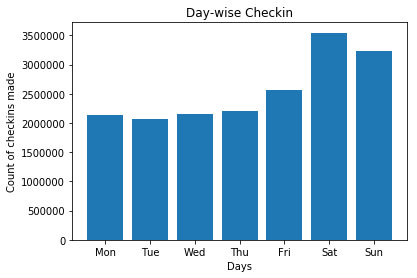

In [31]:
plt.bar (['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],weekday_checkin )
plt.title("Day-wise Checkin")
plt.ylabel('Count of checkins made')
plt.xlabel('Days')
plt.show()

In [32]:
len(checkin_sum)

157075

In [33]:
#check_in_data_3

In [34]:
check_in_data_3['Tot_checkin'] = checkin_sum

D:\Softwares\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
check_in_data_3.head()

,business_id,time.Sun-7,time.Wed-10,time.Sun-21,time.Tue-3,time.Thu-9,time.Mon-14,time.Sat-15,time.Sat-11,time.Fri-12,...,time.Mon-13,time.Wed-12,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Tot_checkin
0,7KPBkxAOEtb3QeIL9PEErg,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,15.0,18.0,21.0,22.0,24.0,28.0,23.0,151.0
1,kREVIrSBbtqBhIYkTccQUg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,0.0,1.0,2.0,0.0,2.0,1.0,7.0
2,tJRDll5yqpZwehenzE2cSg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,0.0,0.0,1.0,1.0,1.0,1.0,6.0
3,tZccfdl6JNw-j5BKnCTIQQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0
4,r1p7RAMzCV_6NPF0dNoR3g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,1.0,0.0,3.0,1.0,5.0


In [36]:
check_in_data_4 = check_in_data_3.copy()

In [37]:
check_in_data_4.head()

,business_id,time.Sun-7,time.Wed-10,time.Sun-21,time.Tue-3,time.Thu-9,time.Mon-14,time.Sat-15,time.Sat-11,time.Fri-12,...,time.Mon-13,time.Wed-12,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Tot_checkin
0,7KPBkxAOEtb3QeIL9PEErg,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,15.0,18.0,21.0,22.0,24.0,28.0,23.0,151.0
1,kREVIrSBbtqBhIYkTccQUg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,0.0,1.0,2.0,0.0,2.0,1.0,7.0
2,tJRDll5yqpZwehenzE2cSg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,0.0,0.0,1.0,1.0,1.0,1.0,6.0
3,tZccfdl6JNw-j5BKnCTIQQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0
4,r1p7RAMzCV_6NPF0dNoR3g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,1.0,0.0,3.0,1.0,5.0


#### Drop rows with less than 100 checkins

In [38]:
check_in_data_5 = check_in_data_3.copy()
check_in_data_4 = check_in_data_4[check_in_data_4['Tot_checkin'] > 100] 


In [39]:
check_in_data_4.head()

,business_id,time.Sun-7,time.Wed-10,time.Sun-21,time.Tue-3,time.Thu-9,time.Mon-14,time.Sat-15,time.Sat-11,time.Fri-12,...,time.Mon-13,time.Wed-12,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Tot_checkin
0,7KPBkxAOEtb3QeIL9PEErg,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,15.0,18.0,21.0,22.0,24.0,28.0,23.0,151.0
18,Y6L37i6rkqDzMesTN5UI2Q,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0,13.0,16.0,18.0,29.0,8.0,9.0,103.0
28,zek4x_a6Io6mU67bc4ahXA,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,...,1.0,NaN,16.0,16.0,20.0,15.0,13.0,29.0,22.0,131.0
47,IpQG7s5l7ba5NxyzTxn7pg,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,16.0,10.0,12.0,12.0,11.0,29.0,16.0,106.0
58,dwtXvp2llq2BYSXQvJpHYw,NaN,NaN,NaN,NaN,NaN,25.0,16.0,2.0,12.0,...,20.0,NaN,116.0,101.0,1.0,105.0,106.0,110.0,0.0,539.0


Even after removing those businessess with les than 100 checkins we get the same distribution

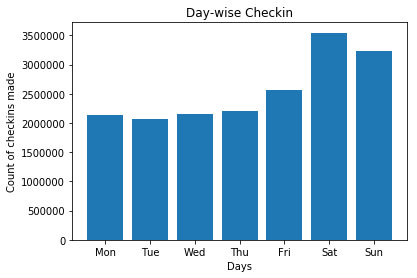

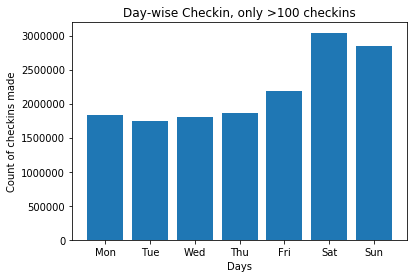

In [40]:
weekday_checkin = list()
for ele in ('Mon','Tue','Wed','Thu','Fri','Sat','Sun'):
    weekday_checkin.append(check_in_data_5[ele].sum(axis=0))
#weekday_checkin
plt.bar (['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],weekday_checkin )
plt.title("Day-wise Checkin")
plt.ylabel('Count of checkins made')
plt.xlabel('Days')
plt.show()


weekday_checkin = list()
for ele in ('Mon','Tue','Wed','Thu','Fri','Sat','Sun'):
    weekday_checkin.append(check_in_data_4[ele].sum(axis=0))
#weekday_checkin
plt.bar (['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],weekday_checkin )
plt.title("Day-wise Checkin, only >100 checkins")
plt.ylabel('Count of checkins made')
plt.xlabel('Days')
plt.show()



In [41]:
check_in_data_5.sort_values('Tot_checkin',ascending=False)
check_in_data_4.sort_values('Tot_checkin',ascending=False)

,business_id,time.Sun-7,time.Wed-10,time.Sun-21,time.Tue-3,time.Thu-9,time.Mon-14,time.Sat-15,time.Sat-11,time.Fri-12,...,time.Mon-13,time.Wed-12,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Tot_checkin
14299,FaHADZARwnY4yvlvpnsfGA,248.0,46.0,1368.0,992.0,32.0,1098.0,1109.0,137.0,378.0,...,1039.0,313.0,22900.0,17474.0,15503.0,17953.0,22502.0,22324.0,19821.0,138477.0
24463,JmI9nslLD7KZqRr__Bg6NQ,82.0,23.0,1125.0,842.0,9.0,1215.0,1011.0,132.0,586.0,...,929.0,444.0,20846.0,15309.0,14728.0,16916.0,20269.0,15956.0,14161.0,118185.0
7008,yQab5dxZzgBLTEHCw9V7_w,6.0,399.0,607.0,95.0,134.0,611.0,340.0,362.0,588.0,...,535.0,446.0,8979.0,6989.0,6924.0,7998.0,8548.0,6279.0,6958.0,52675.0
20097,5LNZ67Yw9RD6nf4_UhXOjw,637.0,59.0,524.0,312.0,106.0,85.0,176.0,142.0,31.0,...,40.0,30.0,5864.0,4612.0,3742.0,4288.0,6118.0,10275.0,10517.0,45416.0
119434,IZivKqtHyz4-ts8KsnvMrA,171.0,1.0,790.0,409.0,1.0,NaN,4.0,1.0,NaN,...,NaN,1.0,5259.0,4411.0,4171.0,4353.0,4641.0,6286.0,7206.0,36327.0
18713,SMPbvZLSMMb7KU76YNYMGg,268.0,74.0,346.0,159.0,122.0,58.0,170.0,119.0,30.0,...,50.0,31.0,4651.0,3548.0,3216.0,3576.0,4931.0,7058.0,6753.0,33733.0
15620,Wxxvi3LZbHNIDwJ-ZimtnA,275.0,24.0,370.0,177.0,64.0,56.0,124.0,99.0,25.0,...,31.0,20.0,3906.0,3031.0,2795.0,3127.0,4715.0,7439.0,6578.0,31591.0
15613,na4Th5DrNauOv-c43QQFvA,322.0,54.0,380.0,190.0,50.0,50.0,82.0,57.0,29.0,...,36.0,34.0,4495.0,3149.0,3036.0,3208.0,4114.0,6146.0,6191.0,30339.0
15626,El4FC8jcawUVgw_0EIcbaQ,253.0,19.0,310.0,179.0,54.0,63.0,180.0,77.0,18.0,...,29.0,14.0,3776.0,2787.0,2681.0,3074.0,4279.0,6489.0,6232.0,29318.0
16173,VyjyHoBg3KC5BSFRlD0ZPQ,246.0,28.0,400.0,180.0,35.0,51.0,78.0,53.0,28.0,...,36.0,22.0,3933.0,2862.0,2838.0,2926.0,3895.0,6114.0,5859.0,28427.0


In [42]:
#check_in_data_4[check_in_data_4['Tot_checkin'] > 500] 

In [43]:
#hr1 = [col for col in check_in_data_4.columns if '-1' in col]
col_list_mon = list()
col_list_tu = list()
col_list_wed = list()
col_list_th = list()
col_list_fr = list()
col_list_sat = list()
col_list_sun = list()

for ind in check_in_data_2:
    if 'Mon' in ind: col_list_mon.append(ind)
    if 'Tue' in ind: col_list_tu.append(ind)
    if 'Wed' in ind: col_list_wed.append(ind)
    if 'Thu' in ind: col_list_th.append(ind)
    if 'Fri' in ind: col_list_fr.append(ind)
    if 'Sat' in ind: col_list_sat.append(ind)
    if 'Sun' in ind: col_list_sun.append(ind)

In [44]:
#col_list_mon

In [45]:
# col_list_mon #len is 24
#sorted(col_list_mon, key=lambda x : x[9])
#sorted(col_list_mon)
#sorted(['aa','cc','ba'], key=lambda x : x[1])

In [46]:
col_list_mon.sort(key=lambda x : int(x[9:]))
col_list_tu.sort(key=lambda x : int(x[9:]))
col_list_wed.sort(key=lambda x : int(x[9:]))
col_list_th.sort(key=lambda x : int(x[9:]))
col_list_fr.sort(key=lambda x : int(x[9:]))
col_list_sat.sort(key=lambda x : int(x[9:]))
col_list_sun.sort(key=lambda x : int(x[9:]))

#col_list_mon

In [47]:
#check_in_data_4[col_list_mon].sum() #series
#sorted(a, key=lambda x : x[1])

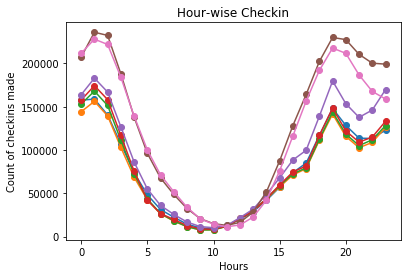

In [48]:
plt.plot (range(0,24),check_in_data_4[col_list_mon].sum(),'-o'
         ,range(0,24),check_in_data_4[col_list_tu].sum(),'-o'
         ,range(0,24),check_in_data_4[col_list_wed].sum(),'-o'
         ,range(0,24),check_in_data_4[col_list_th].sum(),'-o'
         ,range(0,24),check_in_data_4[col_list_fr].sum(),'-o'
         ,range(0,24),check_in_data_4[col_list_sat].sum(),'-o'
         ,range(0,24),check_in_data_4[col_list_sun].sum(),'-o')
#plt.legend()
plt.title("Hour-wise Checkin")
plt.ylabel('Count of checkins made')
plt.xlabel('Hours')
plt.show()

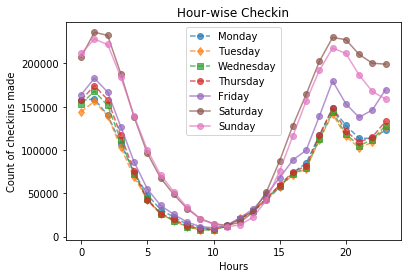

In [49]:
line1,line2,line3,line4,line5,line6,line7 = plt.plot (
          range(0,24),check_in_data_4[col_list_mon].sum(),'--o'
         ,range(0,24),check_in_data_4[col_list_tu].sum(),'--d'
         ,range(0,24),check_in_data_4[col_list_wed].sum(),'--s'
         ,range(0,24),check_in_data_4[col_list_th].sum(),'--o'
         ,range(0,24),check_in_data_4[col_list_fr].sum(),'-o'
         ,range(0,24),check_in_data_4[col_list_sat].sum(),'-o'
         ,range(0,24),check_in_data_4[col_list_sun].sum(),'-o',alpha=0.7)
plt.legend((line1,line2,line3,line4,line5,line6,line7), 
           ('Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday','Sunday'))
plt.title("Hour-wise Checkin")
plt.ylabel('Count of checkins made')
plt.xlabel('Hours')
plt.show()

In [50]:
# # row and column sharing
# f, ((ax1, ax2,ax3,ax4), (ax5, ax6,ax7,ax8)) = plt.subplots(2, 4, sharex='col', sharey='row', figsize=(20, 10))
# 
# ax1.plot(range(0,24),check_in_data_4[col_list_mon].sum())
# ax1.set_title('Sharing x per column, y per row')
# ax2.plot(range(0,24),check_in_data_4[col_list_tu].sum())
# ax3.plot(range(0,24),check_in_data_4[col_list_wed].sum(), color='r')
# ax4.plot(range(0,24),check_in_data_4[col_list_th].sum(), color='r')

What we see here is that: Frequency of checkins greatly decreases in the early morning till the afternoon from where it starts increasing till it reaches its peak around 8 PM


In [51]:
# Save dataframe to csv -- all data
check_in_data_5.to_csv("data/checkin_modified_all.csv", index=False)

In [52]:
# Save dataframe to csv - >100 checkins data
check_in_data_4.to_csv("data/checkin_modified_greater_100_checkin.csv",index=False )

In [54]:
#